In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generating random geographic coordinates + list of cities

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 593


# Retrieving weather data from the cities generated - Open Weather API

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merritt island
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | ormond beach
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | lucapa
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | southbridge
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | dong hoi
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | mariana
Processing Record 18 of Set 1 | muroto
Processing Record 19 of Set 1 | lolua
City not found. Skipping...
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing R

# Creating dataframes and generating scatterplots of various relationships

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,merritt island,28.5392,-80.6720,289.26,65,0,3.09,US,1674530075
1,vaini,-21.2000,-175.2000,303.24,79,20,3.60,TO,1674530081
2,los llanos de aridane,28.6585,-17.9182,288.01,70,100,3.60,ES,1674530081
3,albany,42.6001,-73.9662,272.39,83,69,1.34,US,1674529928
4,butaritari,3.0707,172.7902,300.27,78,53,7.73,KI,1674530083


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,merritt island,28.5392,-80.6720,289.26,65,0,3.09,US,1674530075
1,vaini,-21.2000,-175.2000,303.24,79,20,3.60,TO,1674530081
2,los llanos de aridane,28.6585,-17.9182,288.01,70,100,3.60,ES,1674530081
3,albany,42.6001,-73.9662,272.39,83,69,1.34,US,1674529928
4,butaritari,3.0707,172.7902,300.27,78,53,7.73,KI,1674530083


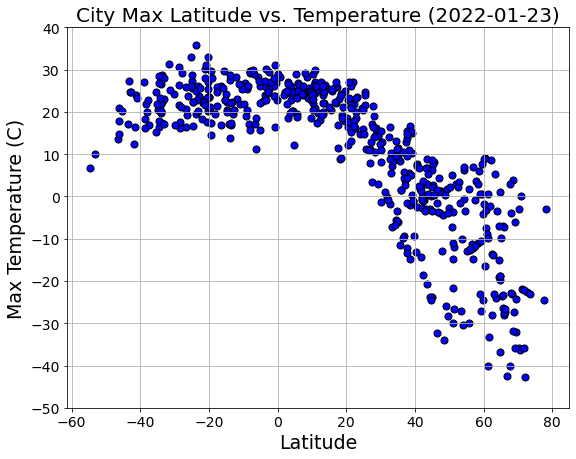

In [75]:
# Convert Max Temp to Celsius first
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o", 
            facecolors="blue", edgecolors="black",s=50
            )

# Incorporate the other graph properties
plt.ylim(-50, 40)
plt.title("City Max Latitude vs. Temperature (2022-01-23)",fontsize=20)
plt.ylabel("Max Temperature (C)",fontsize=19)
plt.xlabel("Latitude",fontsize=19)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Max temperatures in cities at higher latitudes (Northern Hemisphere) are lower than in cities located at lower latitudes (Southern Hemisphere)

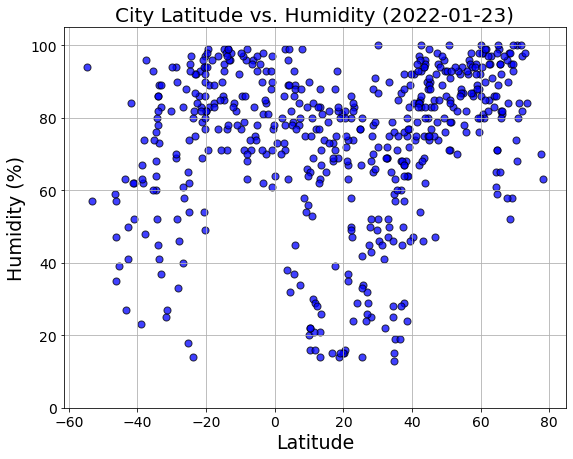

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75,s=50
            )

# Incorporate the other graph properties
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (2022-01-23)",fontsize=20)
plt.ylabel("Humidity (%)",fontsize=19)
plt.xlabel("Latitude",fontsize=19)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Cities at latitudes -40 and 20 generally have lower humidities than cities located at latitudes -20 and 40.

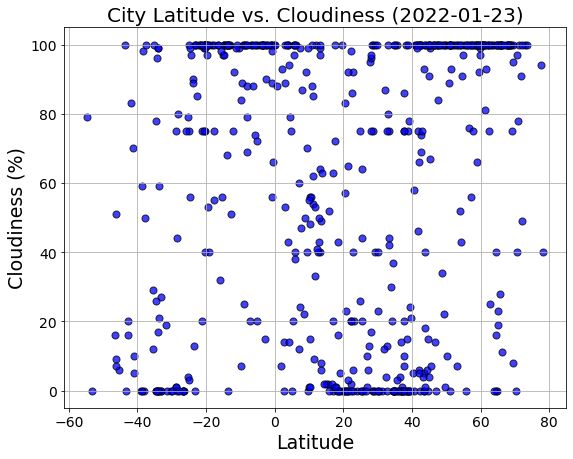

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75, s=50
            )

# Incorporate the other graph properties
plt.ylim(-5, 105)
plt.title("City Latitude vs. Cloudiness (2022-01-23)",fontsize=20)
plt.ylabel("Cloudiness (%)",fontsize=19)
plt.xlabel("Latitude",fontsize=19)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Similarly to humidity, cities at -40, 20-40 Latitudes experience less clouds than cities at -20, 40-60

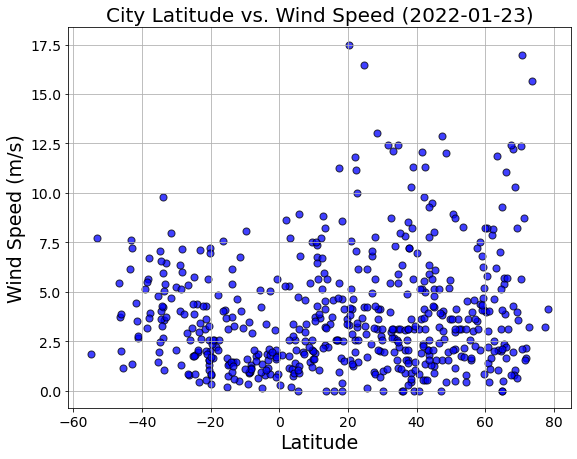

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o", 
            facecolors="blue", edgecolors="black", alpha=0.75, s=50
            )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-01-23)",fontsize=20)
plt.ylabel("Wind Speed (m/s)",fontsize=19)
plt.xlabel("Latitude",fontsize=19)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


#### Lastly, Wind speeds does not seem to have a general pattern - the majority of cities are cluttered below 2.5 m/s, while there are some outlier cities above 15 m/s (at the time of data extraction)

# Linear Regression plots

In [149]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_col,y_col):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.figure(figsize=(9,7))
    plt.scatter(x, y)
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.xlabel(x_col,fontsize=18)
    plt.ylabel(y_col,fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(0.5,0.5),fontsize=15,color="red")
    plt.show()
    print(f"R-value: {r_value}. P-value: {p_value}")
    print(f"Line of best fit: {line_eq}")

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,merritt island,28.5392,-80.6720,16.11,65,0,3.09,US,1674530075
2,los llanos de aridane,28.6585,-17.9182,14.86,70,100,3.60,ES,1674530081
3,albany,42.6001,-73.9662,-0.76,83,69,1.34,US,1674529928
4,butaritari,3.0707,172.7902,27.12,78,53,7.73,KI,1674530083
6,broome,42.2506,-75.8330,-0.64,85,100,4.12,US,1674530084


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaini,-21.2000,-175.2000,30.09,79,20,3.60,TO,1674530081
5,ushuaia,-54.8000,-68.3000,6.68,94,79,1.84,AR,1674529896
9,lucapa,-8.4192,20.7447,17.05,96,100,0.95,AO,1674530086
10,port alfred,-33.5906,26.8910,22.32,89,59,3.58,ZA,1674530087
15,mariana,-20.3778,-43.4161,20.13,97,100,1.30,BR,1674530090


## Temperature vs. Latitude Linear Regression Plot

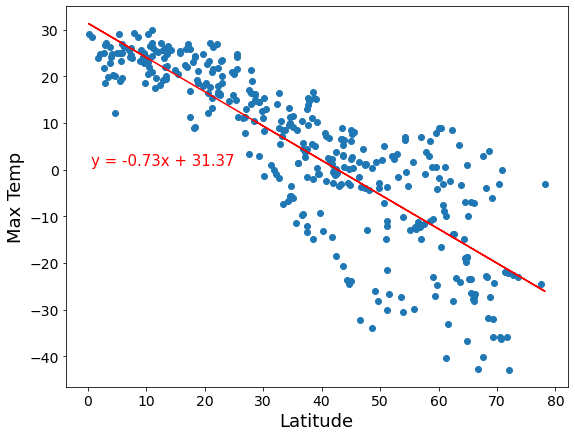

R-value: -0.8425339292116846. P-value: 1.0084615985468431e-101


In [133]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Latitude","Max Temp")

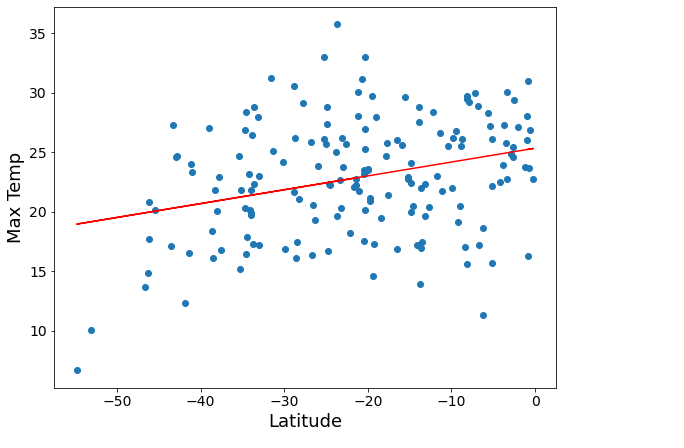

R-value: 0.30588691930047884. P-value: 5.2459421666925024e-05
Line of best fit: y = 0.12x + 25.34


In [138]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"Latitude","Max Temp")
# Don't know why annotation is not coming up on graph, added it below graph.

#### Northern hemisphere - As the Latitude increases, maximum temperature in those cities decreases
#### Southern Hemisphere - As the Latitude approaches 0 (from the negative side), max temperature is gradually increasing. 
#### Both these relationships are significant.

## Humidity vs. Latitude Linear Regression Plot

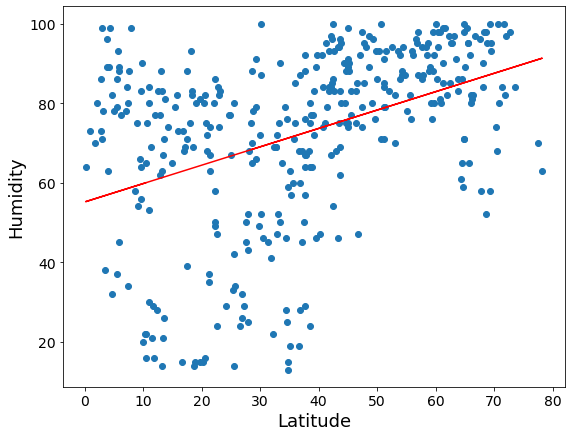

R-value: 0.41201160239400003. P-value: 1.0219591837905178e-16
Line of best fit: y = 0.46x + 55.15


In [144]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Latitude","Humidity")

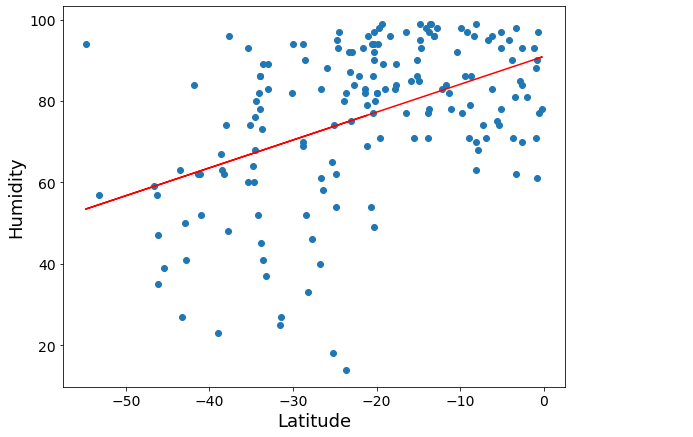

R-value: 0.4614776175454308. P-value: 2.706504577362094e-10
Line of best fit: y = 0.69x + 90.95


In [150]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"Latitude","Humidity")

#### For both hemispheres, as Latitude increases, the level of humidity also increases.
#### These relationships are also both significant.

## Cloudiness vs. Latitude Linear Regression Plot

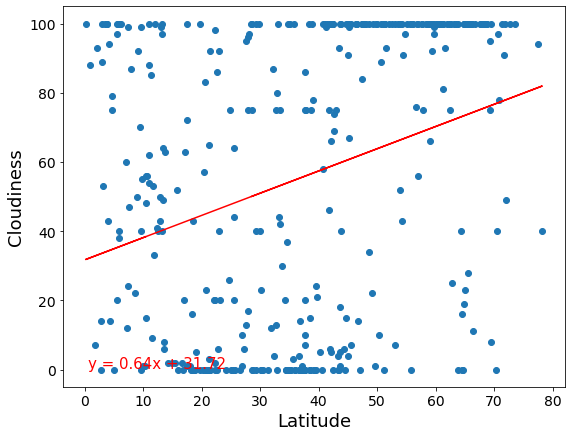

R-value: 0.30550836153788635. P-value: 1.6890348771864969e-09
Line of best fit: y = 0.64x + 31.72


In [151]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

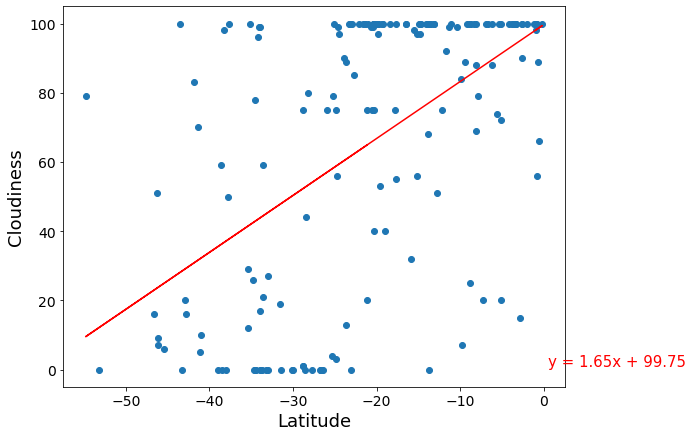

R-value: 0.5267569313985545. P-value: 1.8888150262671626e-13
Line of best fit: y = 1.65x + 99.75


In [146]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

#### Similar to Humidity, as Latitude increases, cities in both hemispheres experience more cloudiness.
#### Again, both relationships are significant.

## Wind Speed vs. Latitude Linear Regression Plot

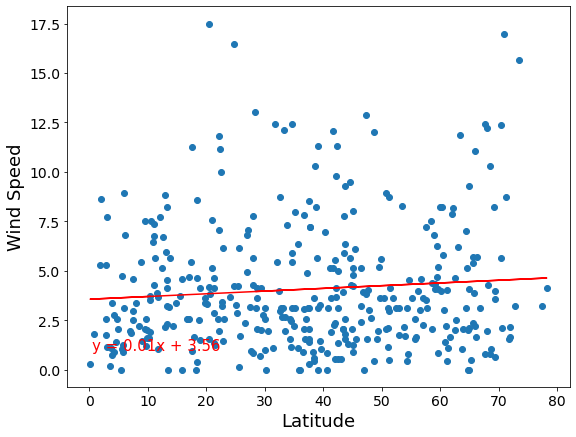

R-value: 0.0853971925414623. P-value: 0.09960584554939365
Line of best fit: y = 0.01x + 3.56


In [147]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

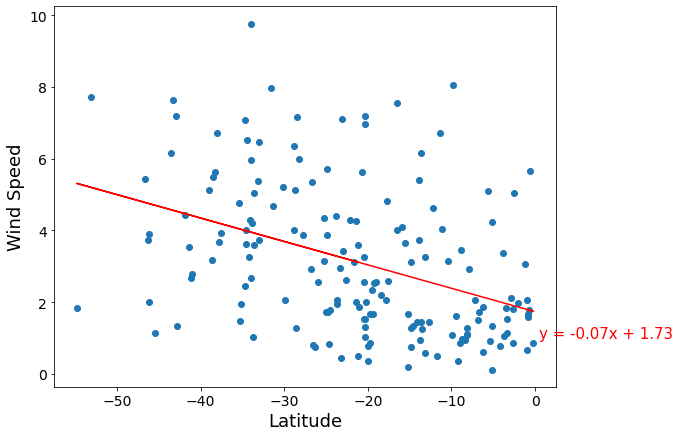

R-value: -0.404692815927995. P-value: 4.835833956196874e-08
Line of best fit: y = -0.07x + 1.73


In [148]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

#### Northern Hemisphere: There is no significant trend detected between cities in the northern hemisphere and wind speed (p-value not significant)

#### Southern Hemisphere: A negative association between cities in the southern hemisphere and wind speed was found, whereby at latitudes approach 0, wind speed decreases.